# Выпуклость полинома

Попробуем найти здесь символьное выражение для определения выпуклости полинома в заданных точках в зависимости от его коэффициентов

In [25]:
from sympy import init_session
init_session()

import numpy as np
from itertools import combinations_with_replacement as cr
from scipy.special import binom

IPython console for SymPy 1.6.2 (Python 3.8.5-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.2/



Для расчетов использую порядок вычисления степеней, который используется в коде, по вычислению полиномов

In [36]:
def powers(order, dim):
    out = np.zeros((0, dim),dtype=int)
    for p in range(order + 1):
        if p == 0:
            outi = np.zeros((1, dim), dtype=int)
            out = np.vstack((out, outi))
        else:
            outi = np.array([sum(i) for i in cr(np.eye(dim, dtype=int), p)])
            out = np.vstack((out, outi))
    return out

In [43]:
order = 3
dim = 2

count = int(binom(order+dim, dim))

a = symbols('a:{}'.format(count))
pws = powers(order,dim)
p = 0
i = 0
for px,py in pws:
    p += a[i] * x**px * y**py
    i += 1
p

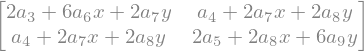

In [44]:
hessian(p,[x,y])

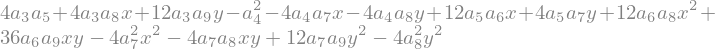

In [45]:
det(hessian(p,[x,y]))